# PCA (Análise de Componentes Principais)

A Análise de Componentes Principais (também conhecida como Transformada de Hotelling ou Transformada Discreta de Karhunen-Loève) é uma forma de reduzir a dimensão do banco de dados, i.e, reduzir o número de variáveis a serem utilizadas para ajustar o modelo.

Para isso é aplicada uma transformação linear nos dados, a partir da qual são criadas novas variáveis com base nas antigas, chamadas de *componentes principais (PC)*, que são combinações lineares das variáveis originais ponderadas pela sua variância e que são completamente descorrelacionadas entre si por definição. 

A PCA também separa os componentes mais importantes para que estejam nas primeiras dimensões, nos eixos principais, com base no percentual da variância do banco de dados contido em cada eixo. Isso permite selecionar as melhores variáveis, que apresentam a maior parte do poder explicativo do banco de dados, e assim realizar previsões mais assertivas.

Objetivos:
* Descorrelacionar as variáveis
* Eliminar variáveis redundantes
* Eliminar informações aleatórias


**Obs.:** Para aplicar o método de PCA, é **crucial** garantir que todos os dados estejam em uma mesma escala. A utilização do StandardScaler é uma ótima forma de realizar essa operação. Além disso, vale ressaltar que a aplicação da PCA é semelhante à do StandardScaler.

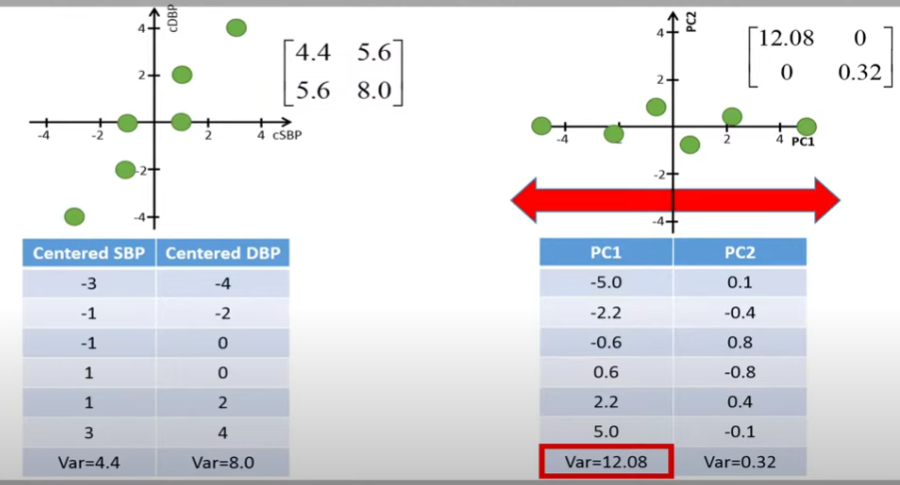

### Padronização

Para aplicar o método de PCA, é importante utilizar variáveis que estão em escalas semelhantes. Uma forma de fazer isso é padronizar todas as variáveis, encontrando a sua distância (em quantidade de desvios-padrão) em relação à média. Para isso, podemos utilizar o objeto `StandardScaler`.

### Álgebra Linear na ACP

Passo a passo:

* Centralizar os dados (para cada eixo, subtrair sua média de todas as observações);
* Calcular a matriz de covariância dos dados;
* Calcular os autovalores e seus autovetores associados a partir da matriz de covariância;
* Normalizar os autovetores (tornar seu comprimento igual a 1);
* Aplicar a transformação linear composta por uma matriz onde cada coluna representa um autovetor, em ordem decrescente definida pela magnitude de seu autovalor associado.

A PCA utiliza dos princípios básicos da decomposição de autovetores para criar suas componentes principais. É crucial entender que a transformação linear mencionada permite criar poucas variáveis a partir de combinações lineares de todos os dados antigos, cujas coordenadas dos eixos (pesos de cada variável) são ponderadas pela magnitude da sua contribuição na variância total do conjunto de dados (maximizando a variância da combinação linear).

Assim, pretende-se obter a primeira componente principal a partir de uma rotação dos eixos dos dados na direção apontada pela matriz de covariância (direção de seu autovetor de maior autovalor), ou seja, na direção das coordenadas que correspondem à maior parte da variância do modelo, reduzindo a participação dos demais eixos e aumentando ainda mais a participação dos eixos significantes. Isso significa que a PCA "concentra" os pontos em torno dos eixos de maior poder explicativo.

Isso corresponde apenas a uma mudança de base para uma "autobase" (base formada por autovetores, que por si só são linearmente independentes).

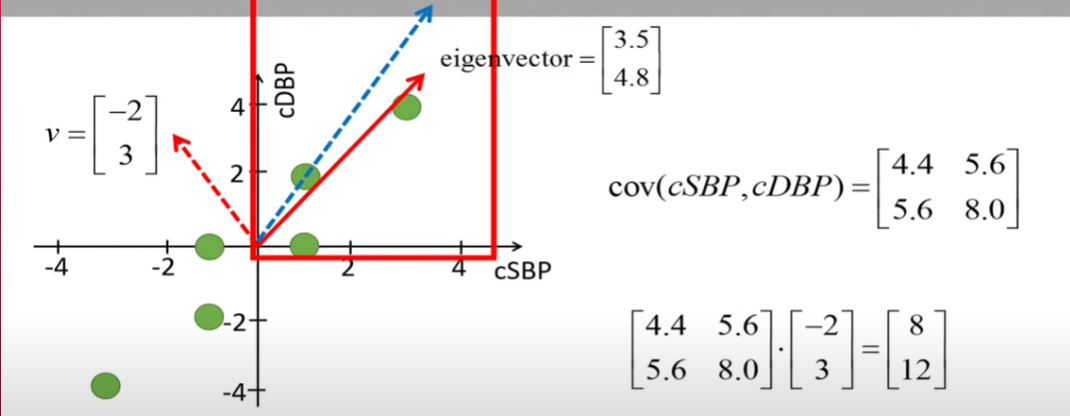

# Construindo o Algoritmo

### Importação de Bibliotecas

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Manipular dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Dados Originais'}, xlabel='alcohol', ylabel='fixed acidity'>

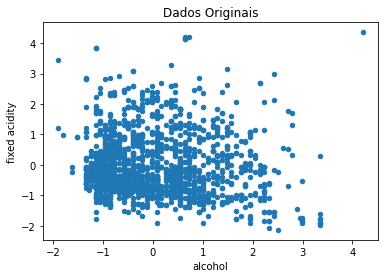

In [27]:
df = pd.read_csv("../dados/winequality-red.csv", sep = ";")
X = df[['alcohol', 'fixed acidity']] #

# Normalização das Variáveis
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

# Gráfico
X = pd.DataFrame(X, columns = ["alcohol", "fixed acidity"])
X.plot(kind = "scatter", x = "alcohol", y = "fixed acidity", title = "Dados Originais")

### Ajuste da PCA

In [44]:
pca = PCA(n_components = 2)
x_transf = pca.fit_transform(X)

In [45]:
pca.explained_variance_ratio_ 

array([0.53083414, 0.46916586])

<AxesSubplot:title={'center':'Dados Transformados'}, xlabel='PC1', ylabel='PC2'>

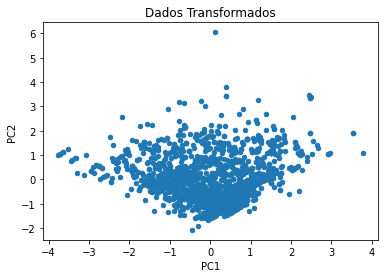

In [37]:
x_transf = pd.DataFrame(x_transf, columns = ["PC1", "PC2"])
x_transf.plot(kind = "scatter", x = "PC1", y = "PC2", title = "Dados Transformados")